# Signate beginner_no54 exp_5


# ライブラリのインポート

In [ ]:
%%bash
pip uninstall lightgbm --yes
pip install lightgbm \
    --no-binary lightgbm \
    --no-cache lightgbm \
    --config-settings=cmake.define.USE_CUDA=ON

pip install catboost -qq
pip install seaborn_qqplot -qq
pip install japanize-matplotlib optuna mojimoji optuna pymysql -qq
pip install optuna -qq
pip install optuna-integration -qq
pip install category_encoders -qq
pip install skorch -qq
pip install shirokumas -qq
pip install shap -qq
pip install jaconv -qq
pip install hydra-core -qq
# pip install wandb -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.7/205.7 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
import catboost
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import functools
import datetime
from dateutil.parser import parse
import japanize_matplotlib
import optuna
import mojimoji as mjmj
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import category_encoders as ce
from pathlib import Path
import os
import re
import pickle
import math
from math import sqrt
from sklearn import preprocessing
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin, clone
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
import skorch
from skorch import NeuralNetClassifier
import torch
from torch import nn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from skorch import NeuralNetClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import jaconv
import unicodedata
import hydra
import sys
from omegaconf import OmegaConf, DictConfig

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# 生データのデータフレーム化

In [ ]:
import pandas as pd
base_path = "/content/drive/MyDrive/signate/beginner_no54"
row_tr_df = pd.read_csv(f"{base_path}/data/train.csv")
row_test_df = pd.read_csv(f"{base_path}/data/test.csv")
row_sample_df = pd.read_csv(f"{base_path}/data/sample_submit.csv", header=None)

tr_df = row_tr_df.copy()
test_df = row_test_df.copy()

for col in tr_df.keys():
    col_l = col.lower()
    tr_df.rename(columns={col: col_l}, inplace=True)
    test_df.rename(columns={col: col_l}, inplace=True)

tr_df_cp = tr_df.copy()
test_df_cp = test_df.copy()

# データのヒストグラム化

In [ ]:
def get_binned_data(x, col, bins=10, label_format='{:02}_{:.0f}-{:.0f}'):

    # データ型チェック
    if type(x) not in (pd.Series, pd.DataFrame):
        x = pd.Series(x)

    if x.isnull().values.any():
        print(col)
        print(x.unique())
        raise ValueError(f"{col}にNaNが含まれています。NaNを削除してください。")

    uniq_type = type(x[0])

    # ラベルが文字型の場合
    if uniq_type is str:
        binned_x = x
        return binned_x, "notbinned"

    # ラベルが数字でunique数が10未満の場合は、文字型に変換する
    if len(x.unique()) < 6:
        binned_x = pd.Series([str(val) for val in x])
        return binned_x, "notbinned"
    else:
        if type(bins) is int:
            binned_value, bin_def = pd.qcut(x, bins, retbins=True, duplicates='drop')
        else:
            bin_def = bins


        labels = [label_format.format(i, bin_def[i], bin_def[i+1]) for i in range(len(bin_def)-1)]

        if type(bins) is int:
            binned_x = pd.qcut(x, bins, labels=labels, duplicates='drop')
        else:
            binned_x = pd.cut(x, bins, labels=labels)

        binned_x = pd.Series([str(val) for val in binned_x])

        return binned_x, "binned"

def meta_subplots(row_num, col_num=3):
    dpi = 100
    fig_x = 10
    fig_y = 8

    if row_num * col_num == 1:
        dpi = 70
        fig_x = 5
        fig_y = 5

    if row_num * col_num == 1:
        dpi = dpi
        fig_x = fig_x
        fig_y = fig_y
    elif row_num * col_num <= 3:
        dpi = dpi*1.25
        fig_x = fig_x*1.25
        fig_y = fig_y*1.25

    elif row_num * col_num <= 6:
        dpi = dpi*1.5
        fig_x = fig_x*1.5
        fig_y = fig_y*1.5

    elif row_num * col_num <= 9:
        dpi = dpi*1.75
        fig_x = fig_x*1.75
        fig_y = fig_y*1.75

    elif row_num * col_num <= 12:
        dpi = dpi*2
        fig_x = fig_x*2
        fig_y = fig_y*2


    fig, axes = plt.subplots(row_num, col_num ,dpi = dpi,
    facecolor = "white",
    edgecolor = "black",
    linewidth= 15,
    figsize=(fig_x, fig_y))
    return fig, axes

def cnvrt_hist(tr_df, test_df, trgt_y, trgt_cols, row_num, col_num, bins=10, return_df=False, show_fig=True):
    bin_values = {}
    notbinned_cols = []
    binned_cols = []
    tr_df_cp = tr_df.copy()
    test_df_cp = test_df.copy()

    id_lst = list(tr_df_cp.id.values)
    id_lst += list(test_df_cp.id.values)
    id_lst = sorted(id_lst)
    add_binned_df = pd.DataFrame(id_lst, columns=["id"])
    fig, axes = meta_subplots(row_num, col_num)
    if row_num * col_num > 1:
        axes = axes.flatten()
    if len(trgt_cols) > 0:
        cols = trgt_cols.copy()
    else:
        cols = tr_df.columns

    if "id" in cols:
        cols = [col for col in cols if col != "id"]

    for i, col in enumerate(cols):
        plot_map = {}
        if i == len(cols):
            break;
        if col == trgt_y:
            continue;
        # ビン分割
        tr_endid = tr_df_cp.index[-1]
        all_df = pd.concat([tr_df_cp, test_df_cp], ignore_index=True)
        all_values = all_df[col]
        all_binned_values, is_binned = get_binned_data(all_values, col, bins)
        if is_binned == "binned":
            print(col)
            binned_cols.append(col)
            add_binned_df[[f"binned_{col}"]] = all_binned_values
        all_df[f"binned_{col}"] = all_binned_values.values
        tr_binned_values = all_binned_values[:tr_endid+1]
        test_binned_values = all_binned_values[tr_endid+1:]
        tr_plot_data = tr_binned_values.value_counts() / tr_df_cp.shape[0]
        tr_plot_data = tr_plot_data.to_dict()
        tr_plot_data = sorted(tr_plot_data.items())
        tr_plot_data = pd.DataFrame(tr_plot_data, columns=[f"binned_{col}", "train_val_rate"])
        tr_plot_data = tr_plot_data.set_index(f"binned_{col}")
        test_plot_data = test_binned_values.value_counts() / test_df_cp.shape[0]
        test_plot_data = test_plot_data.to_dict()
        test_plot_data = sorted(test_plot_data.items())
        test_plot_data = pd.DataFrame(test_plot_data, columns=[f"binned_{col}", "test_val_rate"])
        test_plot_data = test_plot_data.set_index(f"binned_{col}")
        tr_plot_data = tr_plot_data.fillna(0)
        test_plot_data = test_plot_data.fillna(0)
        if col != trgt_y:
            tmp_df = all_df[[col, f"binned_{col}"]].copy()
            y_rate_df = all_df[[col, trgt_y, f"binned_{col}"]][:tr_endid+1].copy()
            y_rate_df[trgt_y] = y_rate_df[trgt_y].apply(lambda x: int(x) if not pd.isna(x) else x)
            # .loc[: trgt]で置換すると強制的にcategory型になる！！！
            y_rate_df[trgt_y] = y_rate_df[trgt_y].astype('float64')
            y_rate_df = y_rate_df.groupby(f"binned_{col}")[trgt_y].mean().reset_index()
            y_rate_df.rename(columns={f"{trgt_y}": f"{trgt_y}_rate"}, inplace=True)
            y_rate_df.set_index(f"binned_{col}", inplace=True)
            tr_plot_data = pd.merge(tr_plot_data, y_rate_df, left_index=True, right_index=True, how='left')
            tr_plot_data[f"{trgt_y}_rate"] = tr_plot_data[f"{trgt_y}_rate"].fillna(0)
        w = 0.4
        x_axis_labels = [i for i in range(len(tr_plot_data.index.tolist()))]
        if row_num * col_num > 1:
            ax = axes[i]
        else:
            ax = axes
        ax_tr_dict = tr_plot_data[["train_val_rate"]].to_dict()["train_val_rate"]
        ax_test_dict = test_plot_data[["test_val_rate"]].to_dict()["test_val_rate"]
        ax2_tr_dict = tr_plot_data[[f"{trgt_y}_rate"]].to_dict()[f"{trgt_y}_rate"]
        ax.bar(x_axis_labels, ax_tr_dict.values(), width=w, color='red')
        plt_test_x = test_plot_data.index.tolist()
        tmp_plt_test_x = [i for i in range(len(plt_test_x))]
        tmp_plt_test_x = [int(x)+ w for x in tmp_plt_test_x]
        ax.bar(tmp_plt_test_x, ax_test_dict.values(), width=w, color='blue')
        plot_label_x = list(ax_tr_dict.keys())
        tmp_plot_label_x = [i for i in range(len(plot_label_x))]
        tmp_plot_label_x = [int(x)+ w/2 for x in tmp_plot_label_x]
        bin_values[col] = plot_label_x
        ax.set_xticks(tmp_plot_label_x)
        ax.set_xticklabels(plot_label_x, rotation=30)
        ax.xaxis.set_tick_params(direction='out', labelsize=7, width=3, pad=3)
        upper_y = test_plot_data["test_val_rate"].max() + 0.1
        ax.set_ylim([0, upper_y])
        ax.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        ax.set_xlabel(f"{col}", fontsize=7.5)
        ax.axes.xaxis.set_ticklabels([])
        ax2 = ax.twinx()
        ax2.plot(x_axis_labels, ax2_tr_dict.values(), marker='o', color='g')
        ax2.yaxis.set_tick_params(direction='out', labelsize=7, width=1.5, pad=5)
        upper_y =tr_plot_data[f"{trgt_y}_rate"].max() + 0.1
        ax2.set_ylim([0, upper_y])
        ax2.set_ylabel("")
    fig.suptitle("Train_Test_Hist", fontsize=7.5, y=0.95)
    plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.93, wspace=0.3, hspace=0.35)
    if row_num * col_num > 1:
        for i in range(len(cols), len(axes.flatten())):
                fig.delaxes(axes.flatten()[i])
    if not show_fig:
        plt.close(fig)
    if return_df:
        if len(binned_cols) > 0:
            tr_df = pd.merge(tr_df, add_binned_df, on="id", how="left")
            test_df = pd.merge(test_df, add_binned_df, on="id", how="left")
        return tr_df, test_df, bin_values
    else:
        return bin_values

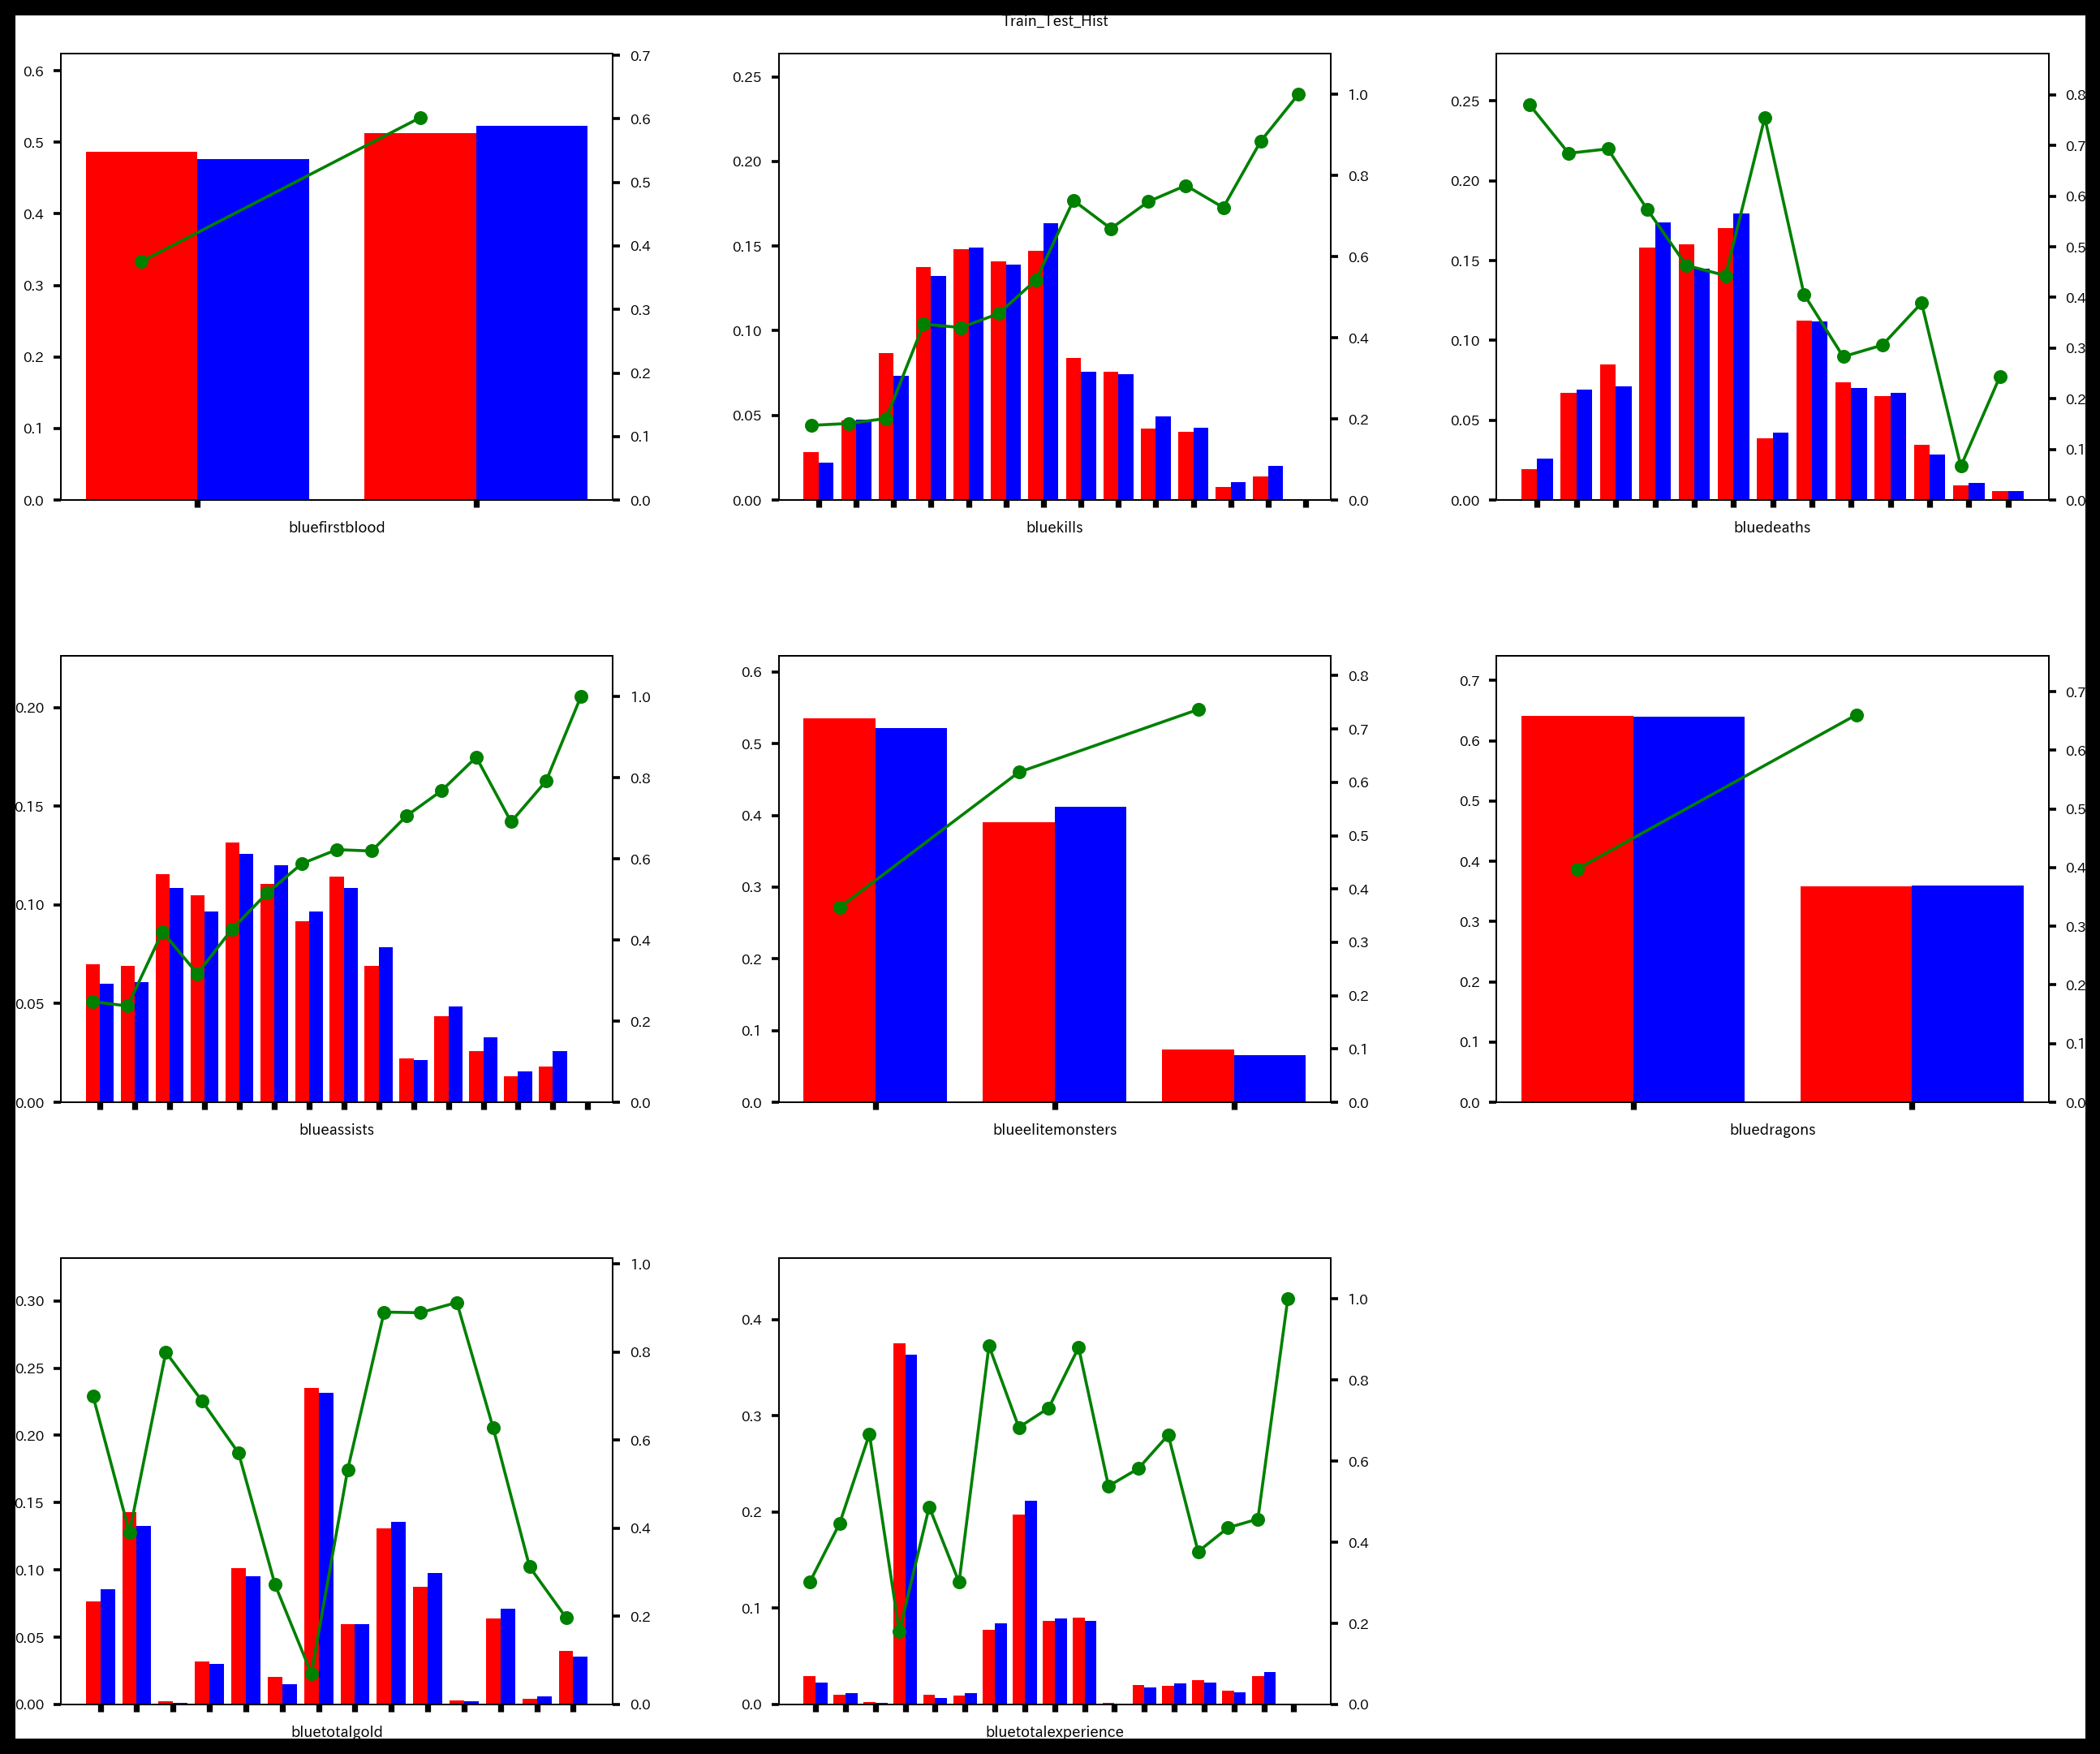

In [ ]:
trgt_y = "bluewins"
trgt_cols = ['bluefirstblood', 'bluekills', 'bluedeaths', 'blueassists',
             'blueelitemonsters', 'bluedragons', 'bluetotalgold', 'bluetotalexperience']

bin_values = cnvrt_hist(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_cols, row_num=3, col_num=3, bins=100, return_df=False)

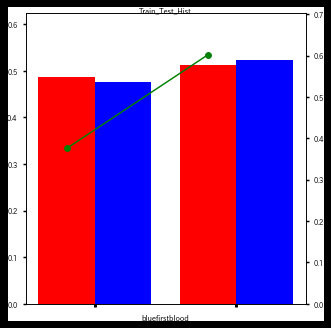

In [ ]:
trgt_col = ["bluefirstblood"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=tr_df, test_df=test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

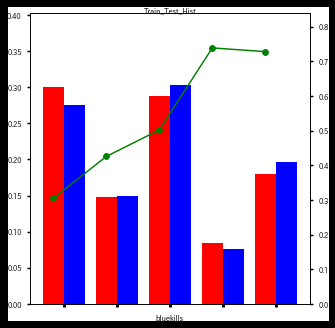

In [ ]:
trgt_col = ["bluekills"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

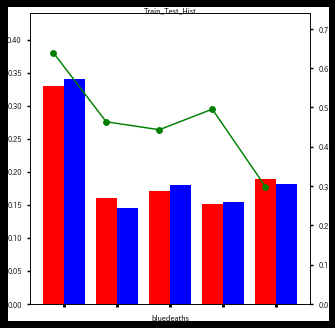

In [ ]:
trgt_col = ["bluedeaths"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

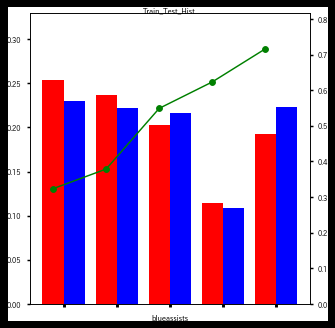

In [ ]:
trgt_col = ["blueassists"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

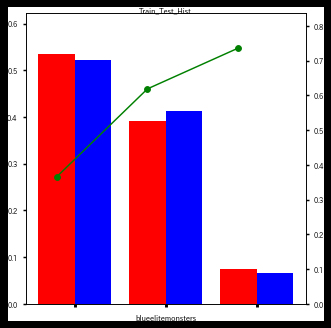

In [ ]:
trgt_col = ["blueelitemonsters"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

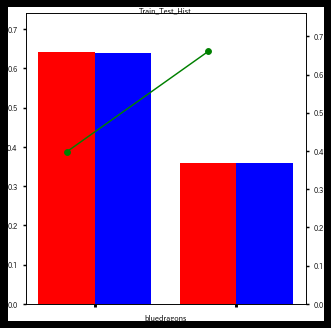

In [ ]:
trgt_col = ["bluedragons"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

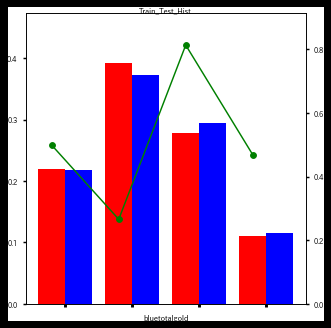

In [ ]:
trgt_col = ["bluetotalgold"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

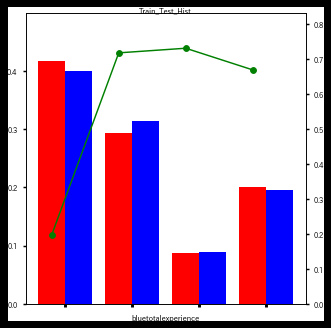

In [ ]:
trgt_col = ["bluetotalexperience"]
_tr_df, _test_df, bin_values = cnvrt_hist(tr_df=_tr_df, test_df=_test_df, trgt_y=trgt_y, trgt_cols=trgt_col, row_num=1, col_num=1, bins=5, return_df=True)

In [ ]:
# trgt_cols = ['bluefirstblood', 'bluekills', 'bluedeaths', 'blueassists', 'blueelitemonsters', 'bluedragons', 'bluetotalgold', 'bluetotalexperience']

In [ ]:
# convrt_histでヒストグラムしても変化のないカラムは削除

_del_cols = ["bluefirstblood", "blueelitemonsters", "bluedragons"]

del_cols = []

for col in _del_cols:
    col = f"binned_{col}"
    del_cols.append(col)
_tr_df = _tr_df.drop(del_cols, axis=1)
_test_df = _test_df.drop(del_cols, axis=1)

# 集約特徴量

In [ ]:
cate_cols = ["bluefirstblood"]
# category型にしたいカラムを変換
def cnvrt_cate(df, cate_cols):
    for col in df.columns:
        if col in cate_cols:
            df = df.astype({f"{col}": "category"})
        else:
            pass
    return df


_tr_df = cnvrt_cate(_tr_df, cate_cols)
_test_df = cnvrt_cate(_test_df, cate_cols)

def cnvrt_cate(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")
        else:
            pass
    return df

_tr_df = cnvrt_cate(_tr_df)
_test_df = cnvrt_cate(_test_df)

In [ ]:
def make_agg_feats(inp_df):
    df = inp_df.copy()
    grby_cols = df.columns
    trgt_cols = df.columns
    grby_cols = [col for col in grby_cols if col not in ["id", "bluewins"]]
    trgt_cols = [col for col in trgt_cols if col not in ["id", "bluewins"]]

    for grby_col in grby_cols:
        if df[grby_col].dtype == "category":
            for trgt_col in trgt_cols:
                # 指定したカラムはエンコードしない
                if trgt_col in ["passport", "is_marrie", "has_car", "has_child", f"{grby_col}"]:
                    continue;

                if df[trgt_col].dtype == "category":
                    tmp_df = df.groupby(df[grby_col], observed=False)[f"{trgt_col}"].apply(lambda x: x.mode()[0])
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mode_{trgt_col}")

                if df[trgt_col].dtype in ["int64", "float64"]:
                    tmp_df = df.groupby(f"{grby_col}", observed=False)[f"{trgt_col}"].apply(lambda x: x.mean())
                    tmp_df = tmp_df.rename(f"grby_{grby_col}_mean_{trgt_col}")

                df = pd.merge(df, tmp_df, left_on=[f"{grby_col}"], right_index=True, how='left')
    return df

_tr_df_2 = make_agg_feats(_tr_df)
_test_df_2 = make_agg_feats(_test_df)

In [ ]:
_tr_df_2 = cnvrt_cate(_tr_df_2)
_test_df_2 = cnvrt_cate(_test_df_2)

# clean clumns

In [ ]:
def clean_game_id(inp_tr_df, inp_test_df):
    tr_df = inp_tr_df.copy()
    test_df = inp_test_df.copy()
    tr_df.rename(columns={"gameid": "id"}, inplace=True)
    test_df.rename(columns={"gameid": "id"}, inplace=True)
    return tr_df, test_df

from sklearn.preprocessing import StandardScaler
def cnvrt_std(inp_tr_df, inp_test_df, stded_cols):
    tr_df =  inp_tr_df.copy()
    test_df =  inp_test_df.copy()
    std_scaler = StandardScaler()
    std_scaler.fit(tr_df[stded_cols])
    tr_df[stded_cols] = std_scaler.transform(tr_df[stded_cols])
    test_df[stded_cols] = std_scaler.transform(test_df[stded_cols])

    return tr_df, test_df


In [ ]:
tr_df, test_df = clean_game_id(_tr_df_2, _test_df_2)

In [ ]:
exp_id = 5

base_path = Path('/content/drive/MyDrive/signate/beginner_no54/')
tmp_dir = base_path / "data/cleaned_data"
tmp_dir.mkdir(parents=True, exist_ok=True)
with open(base_path / f"data/cleaned_data/cleaned_tr_df_exam_{exp_id}.pickle", 'wb') as f:
    pickle.dump(tr_df, f)
with open(base_path / f"data/cleaned_data/cleaned_test_df_exam_{exp_id}.pickle", 'wb') as f:
    pickle.dump(test_df, f)

# pythonファイルで実行

In [ ]:
# xgb_singleでs_n_trials: 1000, epochs: 1000

! python3 /content/drive/MyDrive/signate/beginner_no54/utility/main.py 5

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
///// レベル1の学習を開始します /////
///// 使用する全てのベースモデル(LV1)は以下の通りです /////
	///// xgbclsf /////
	///// lgbclsf /////
	///// catclsf /////
///// xgbclsfの学習をSTART ! /////
///// now... level_1 //////
///// search for xgbclsf /////
[I 2025-02-12 07:18:01,786] A new study created in RDB with name: study_ens_level_1_xgbclsf

◎ level_1_xgbclsf_GLOBAL_TRIAL_1 strat...
[I 2025-02-12 07:18:01,889] A new study created in memory with name: no-name-e0f929b8-dd9e-441d-8984-abf4c0d0b12b
[I 2025-02-12 07:18:01,890] A new study created in memory with name: no-name-f2013364-f8e5-462d-a5cc-b04342cded73
///// now...level_1_xgbclsf_local_study_start ! /////
trial.params: {'max_depth': 4, 'max_leaves': 9

In [ ]:
base_path = Path('/content/drive/MyDrive/signate/beginner_no54')
exp_id = 5
run_id = 3

with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/tr_df.pickle", 'rb') as f:
    tr_df = pickle.load(f)

# base_path = Path('/content/drive/MyDrive/signate/beginner_no52')
with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/test_df.pickle", 'rb') as f:
    test_df = pickle.load(f)

# base_path = Path('/content/drive/MyDrive/signate/beginner_no52')
with open(base_path / f"output/exp/exp_{exp_id}/run_{run_id}/output_path.pickle", 'rb') as f:
    output_path = pickle.load(f)

AUC:  0.9885190618145792


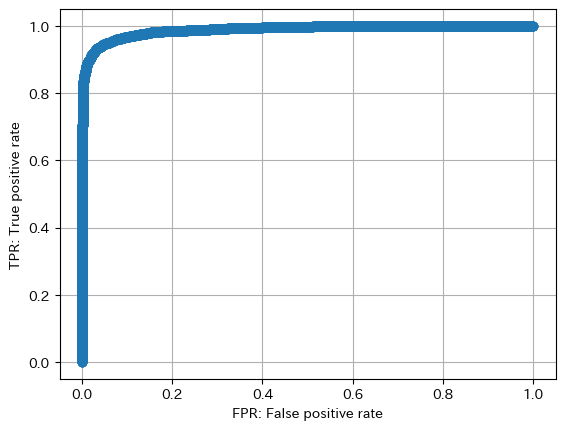

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

trgt_y = "bluewins"

def plot_roc(meta_tr_df, meta_test_df, trgt_y):
    y_true = meta_tr_df[f"{trgt_y}"]
    y_score = meta_tr_df[f"{trgt_y}_pred_proba"]
    auc_score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)

    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()

    return auc_score
auc_score = plot_roc(tr_df, test_df, trgt_y)
print("AUC: ", auc_score )

In [ ]:
def save_submit(output_path, trgt_df, trgt_y, row_sample_df, threshold):
    submit_df = row_sample_df.copy()
    exam_id = re.findall("exp_(\d)", str(output_path))[0]
    run_id = re.findall("run_(\d)", str(output_path))[0]
    df = trgt_df[["id", f"{trgt_y}_pred_proba"]]
    save_path = output_path / f"submit_exam_{exam_id}_{run_id}_th_{threshold}.csv"
    submit_df[1] = df[f"{trgt_y}_pred_proba"].values
    submit_df[1] = submit_df[1].apply(lambda x: 0 if x < threshold else 1)
    submit_df.to_csv(save_path, encoding="shift_jis", index=False, header=None)
    return submit_df


trgt_y = "bluewins"
save_submit(output_path, test_df, trgt_y, row_sample_df, 0.5)

,0,1
0,9,1
1,15,1
2,18,0
3,23,0
4,31,0
...,...,...
1995,9971,0
1996,9980,0
1997,9983,1
1998,9996,1
